# Day6 Task : Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = r'C:\Users\Omar_Atif\Desktop\jupyter python\BostonHousing.csv'

In [3]:
url = file_id

In [4]:
data = pd.read_csv(url)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
#  dimensions of your DataFrame 
data.shape

(506, 14)

In [9]:
if data.duplicated().any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

print(data.duplicated())

There are no duplicate rows in the DataFrame.
0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool


In [11]:
# For categorical variables
print(data['chas'].value_counts())

chas
0    471
1     35
Name: count, dtype: int64


In [12]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
print(data['chas'].unique())

[0 1]


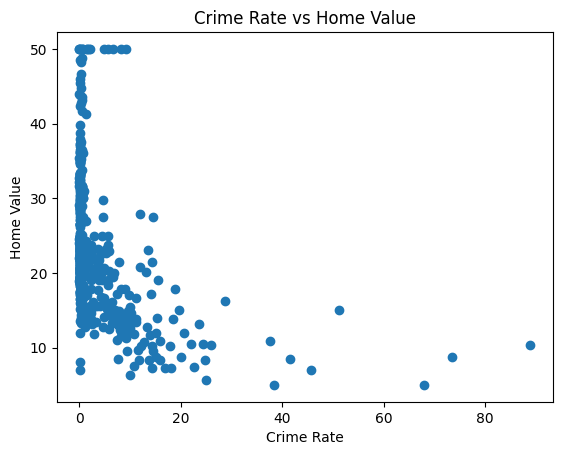

In [15]:
plt.scatter(data['crim'], data['medv'])
plt.title('Crime Rate vs Home Value')
plt.xlabel('Crime Rate')
plt.ylabel('Home Value')
plt.show()

# visualizations 

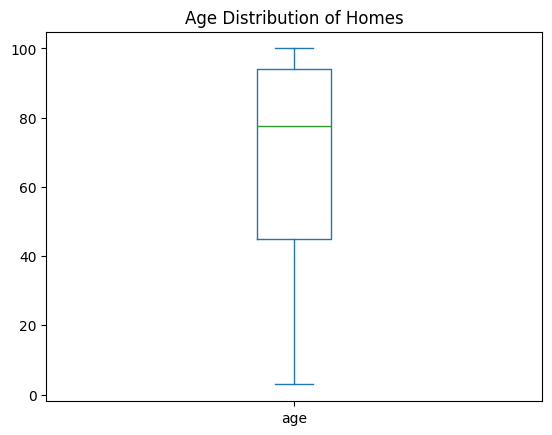

In [17]:
data['age'].plot(kind='box')
plt.title('Age Distribution of Homes')
plt.show()

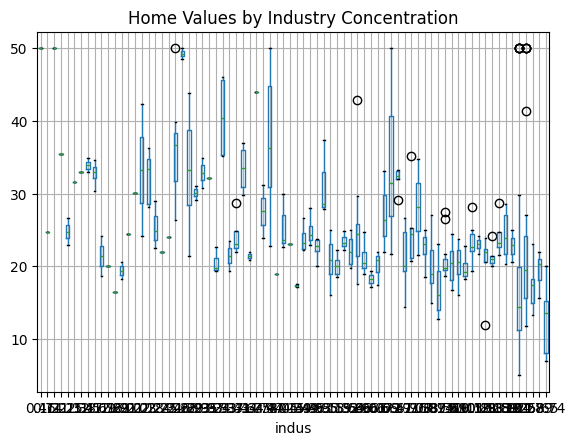

In [19]:
data.boxplot(column='medv', by='indus')
plt.title('Home Values by Industry Concentration')
plt.suptitle('')
plt.show()

In [20]:
import matplotlib.pyplot as plt

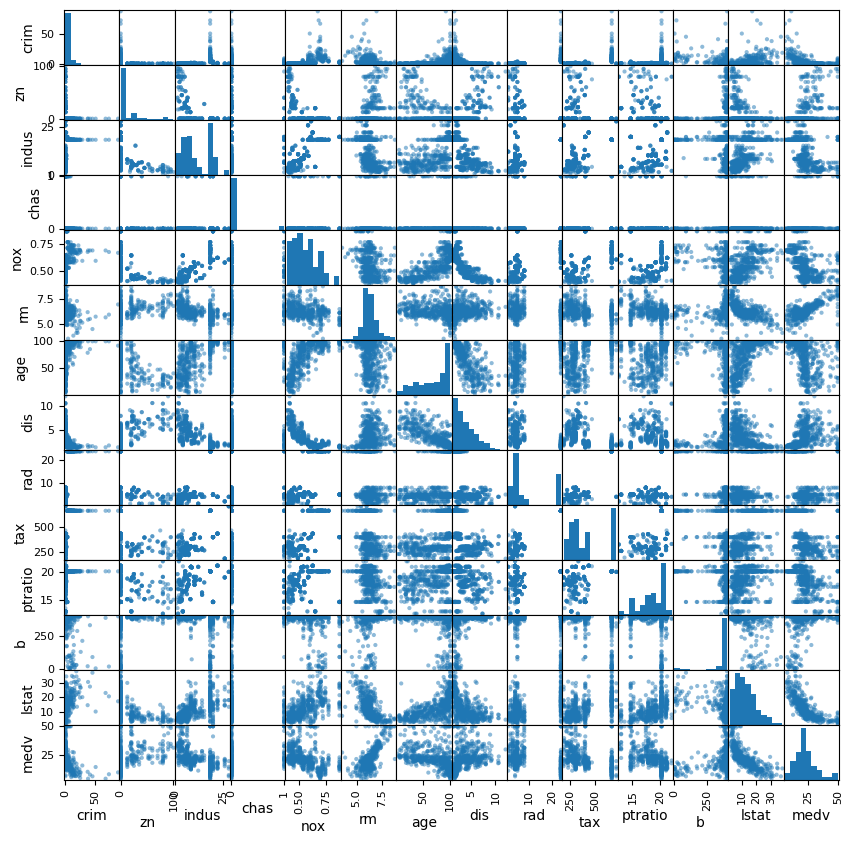

In [23]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
scatter_matrix(numeric_data, figsize=(10, 10))
plt.show()

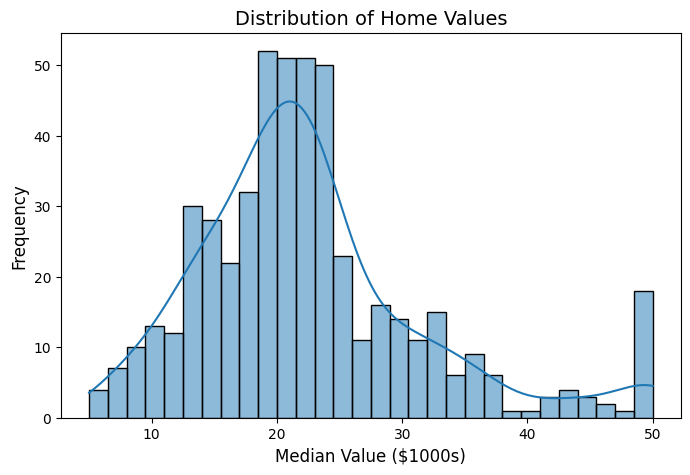

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data['medv'], bins=30, kde=True)
plt.title('Distribution of Home Values', fontsize=14)
plt.xlabel('Median Value ($1000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#  linear regression

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Separate features and target
X = data.drop('medv', axis=1)
y = data['medv']
# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [40]:
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{set_name} Set Evaluation:")
    print(f"R-squared (R²): {r2:.4f}")
    
    return {'R2': r2}

# Evaluate on both sets
train_metrics = evaluate_model(y_train, y_train_pred, "Training")
test_metrics = evaluate_model(y_test, y_test_pred, "Test")



Training Set Evaluation:
R-squared (R²): 0.7506

Test Set Evaluation:
R-squared (R²): 0.6665
